In [1]:
%matplotlib inline

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

In [3]:
import pandas as pd
import pickle as pkl
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
def year_binner(year,val=10):
    return year - year%val

In [5]:
context_df=pd.read_pickle('/data/dharp/compounds/datasets/contexts/contexts_new.pkl')
context_df

,context,year,count
0,"""_NOUN",1500,8
1,"""_NOUN",1501,2
2,"""_NOUN",1700,2
3,"""_NOUN",1701,3
4,"""_NOUN",1764,1
...,...,...,...
96646330,😊_NOUN,2019,10
96646331,😊_VERB,2016,10
96646332,😊_VERB,2017,40
96646333,😊_VERB,2018,42


In [6]:
context_df['decade']=year_binner(context_df['year'].values,10)

In [7]:
decade_df=context_df.groupby(['decade'])['count'].sum().to_frame().reset_index()

In [8]:
decade_df.set_index('decade',inplace=True)
decade_df

,count
decade,
1470,687382
1480,813453
1490,276621
1500,3631689
1510,130202
1520,671196
1530,642032
1540,852497
1550,832623


In [9]:
decade_df['count_per']=decade_df['count']/decade_df['count'].sum()*100
decade_df

,count,count_per
decade,,
1470,687382,0.000058
1480,813453,0.000069
1490,276621,0.000023
1500,3631689,0.000307
1510,130202,0.000011
1520,671196,0.000057
1530,642032,0.000054
1540,852497,0.000072
1550,832623,0.000070


In [10]:
decade_df.loc[decade_df.index<1800]['count_per'].sum()

0.1957667837530998

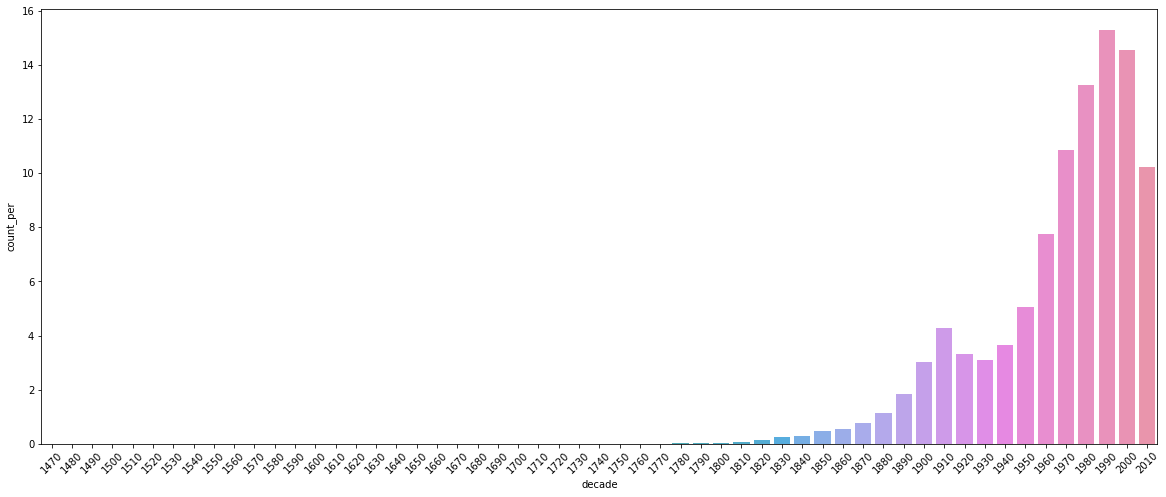

In [11]:
plt.figure(figsize = (20,8))
ax = sns.barplot(x=decade_df.index, y="count_per", data=decade_df)
_=ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)

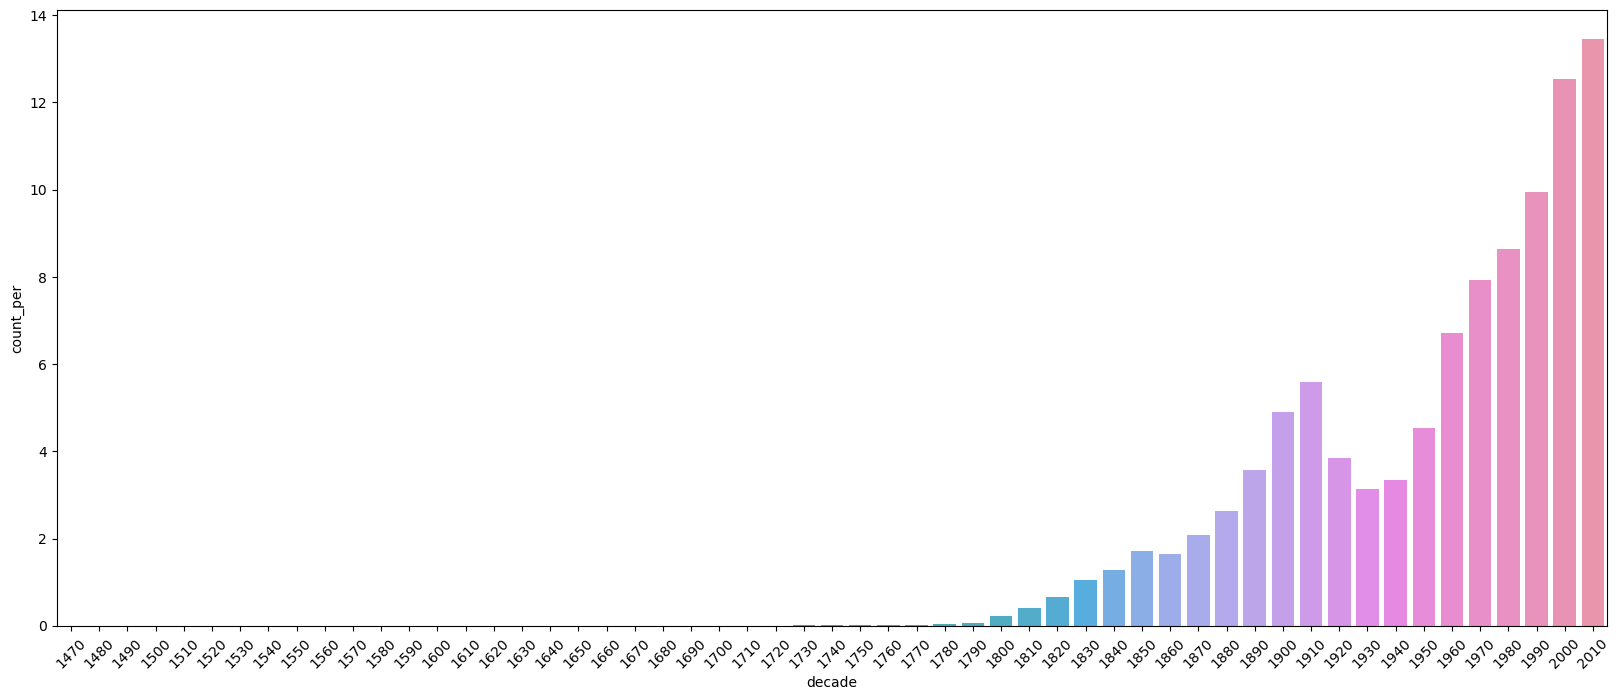

In [12]:
plt.figure(figsize = (20,8))
ax = sns.barplot(x=decade_df.index, y="count_per", data=decade_df)
_=ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)

In [13]:
context_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96646335 entries, 0 to 96646334
Data columns (total 4 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   context  object
 1   year     int64 
 2   count    int64 
 3   decade   int64 
dtypes: int64(3), object(1)
memory usage: 2.9+ GB


In [14]:
context_df=context_df.loc[context_df['year']>=1800]
context_df

,context,year,count,decade
5,"""_NOUN",1801,2,1800
6,"""_NOUN",1820,1,1820
7,"""_NOUN",1821,1,1820
8,"""_NOUN",1823,4,1820
9,"""_NOUN",1828,1,1820
...,...,...,...,...
96646330,😊_NOUN,2019,10,2010
96646331,😊_VERB,2016,10,2010
96646332,😊_VERB,2017,40,2010
96646333,😊_VERB,2018,42,2010


In [15]:
year_counts_df=context_df.groupby(['year'])['count'].sum().to_frame().reset_index()
year_counts_df['count_per']=year_counts_df['count']/year_counts_df['count'].sum()*100
year_counts_df

,year,count,count_per
0,1800,170971719,0.014464
1,1801,176516380,0.014933
2,1802,156393079,0.013230
3,1803,231034475,0.019545
4,1804,205867538,0.017416
...,...,...,...
215,2015,14979954893,1.267249
216,2016,14658632218,1.240066
217,2017,16229078516,1.372920
218,2018,15895330323,1.344686


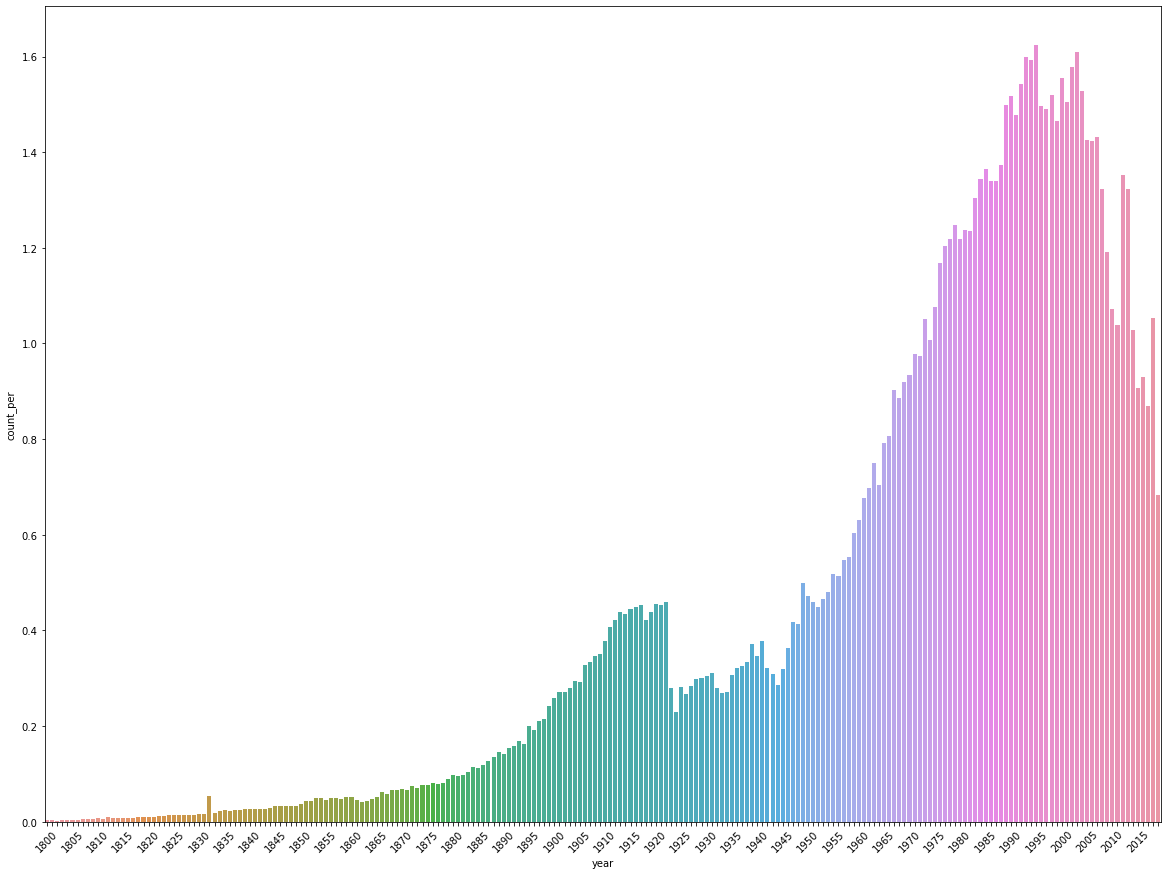

In [15]:
plt.figure(figsize = (20,15))
ax = sns.barplot(x='year', y="count_per", data=year_counts_df)
_=ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
n = 5  # Keeps every 7th label
_=[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]

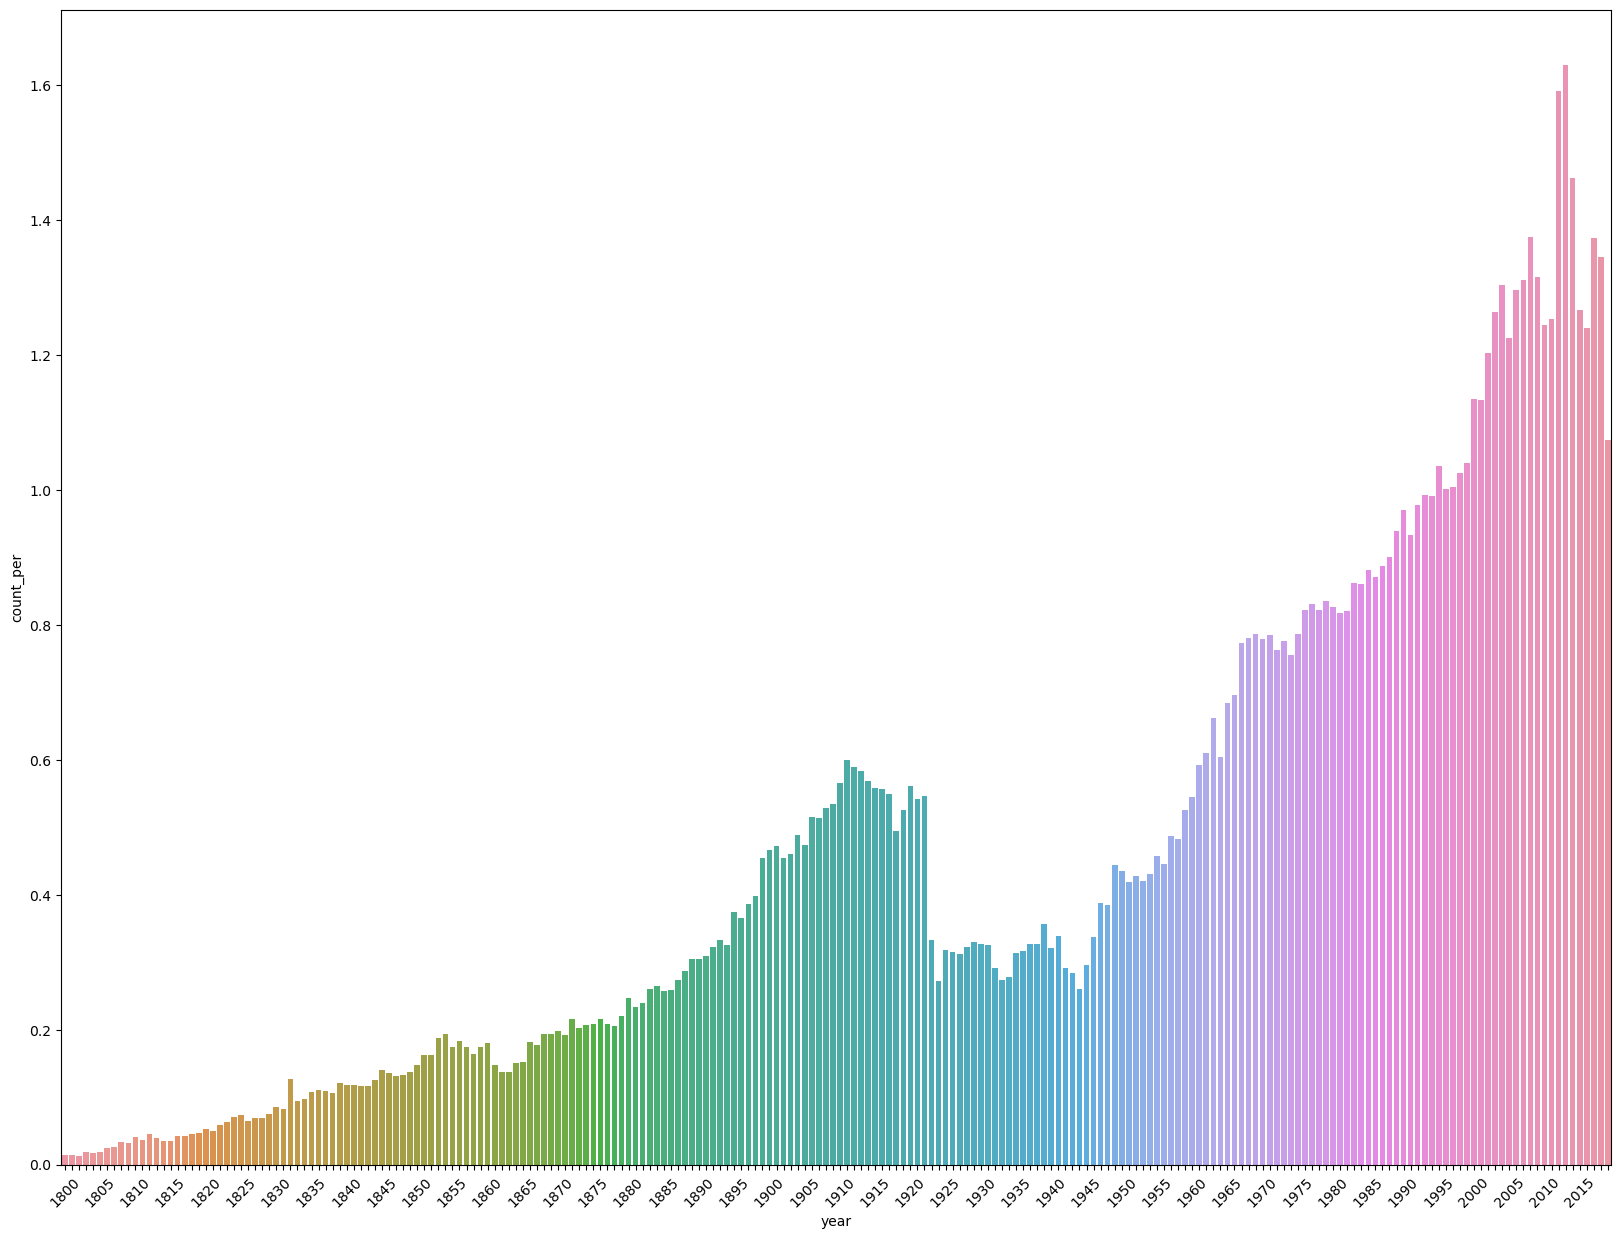

In [16]:
plt.figure(figsize = (20,15))
ax = sns.barplot(x='year', y="count_per", data=year_counts_df)
_=ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
n = 5  # Keeps every 7th label
_=[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]

In [17]:
presence_df=context_df.groupby(['context','year']).size().to_frame().reset_index().context.value_counts().to_frame()
total_list=presence_df.loc[presence_df.context==220].index.to_list()
len(total_list)

45006

In [18]:
content_words_df=context_df.groupby(['context'])['count'].sum().to_frame().reset_index()
content_words_df

,context,count
0,"""_NOUN",79586
1,#_ADJ,152
2,#_ADV,40
3,#_NOUN,27844570
4,#_VERB,173
...,...,...
1528119,𝑏_NOUN,104
1528120,𝑥_NOUN,988
1528121,𝑦_NOUN,224
1528122,😊_NOUN,56


In [27]:
content_words_df.sort_values(by='count',ascending=False)

,context,count
599494,have_VERB,14361607463
794684,make_VERB,7693425030
1359464,time_NOUN,7275023871
1185562,say_VERB,7164334899
401903,do_VERB,6869117389
...,...,...
538068,fuffer_NOUN,2
519576,folicitor_NOUN,1
706719,jećts_NOUN,1
711724,junćture_NOUN,1


In [20]:
context_top_50k=content_words_df.sort_values(by='count',ascending=False).head(50_000)['context'].to_list()
len(context_top_50k)

50000

In [21]:
to_save_context=list(set(context_top_50k).union(total_list))
len(to_save_context)

64360

In [22]:
plot_df=context_df.loc[context_df.context.isin(to_save_context)].groupby(['year'])['count'].sum().to_frame().reset_index()
plot_df=plot_df.set_index('year')/year_counts_df.set_index('year')*100
plot_df

,count,count_per
year,,
1800,99.644912,NaN
1801,99.719906,NaN
1802,99.762280,NaN
1803,99.691502,NaN
1804,99.780384,NaN
...,...,...
2015,99.685156,NaN
2016,99.680935,NaN
2017,99.588087,NaN


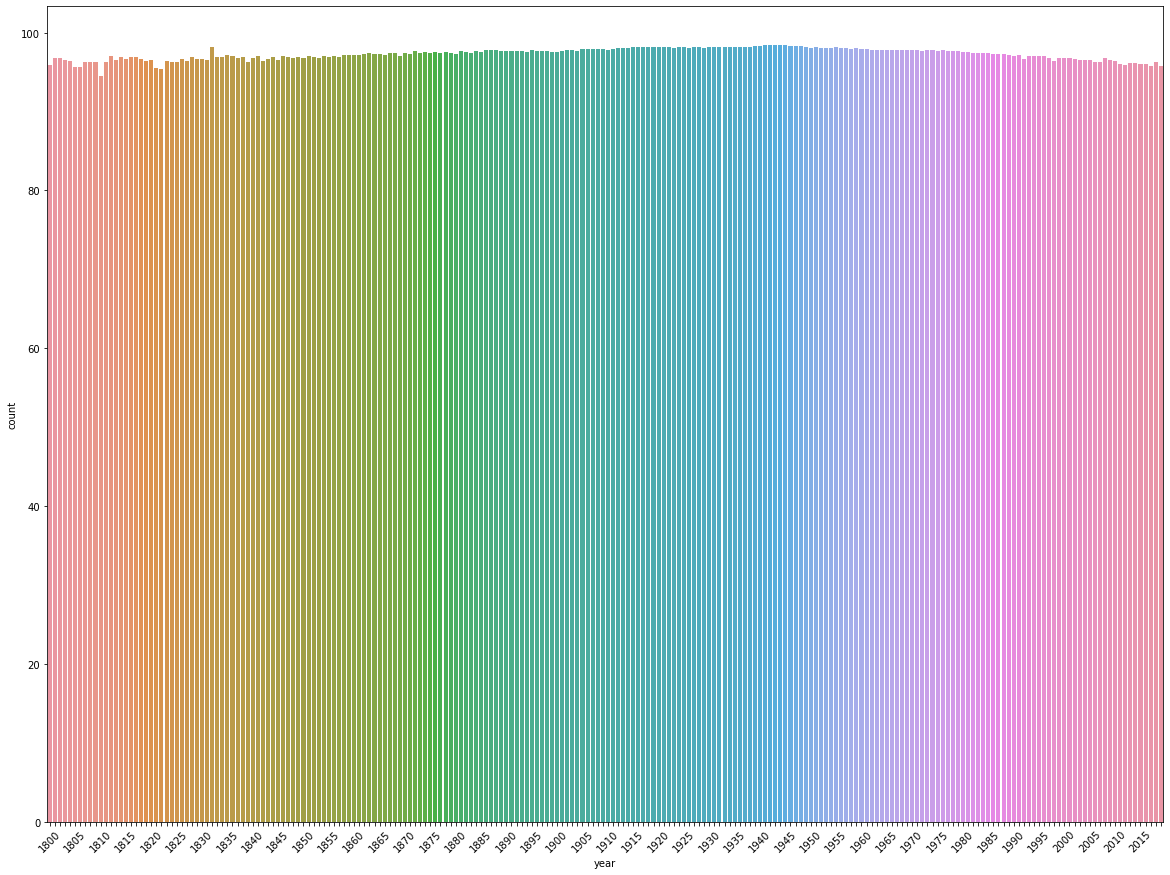

In [21]:
plt.figure(figsize = (20,15))
ax = sns.barplot(x=plot_df.index, y="count", data=plot_df)
_=ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
n = 5  # Keeps every 7th label
_=[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]

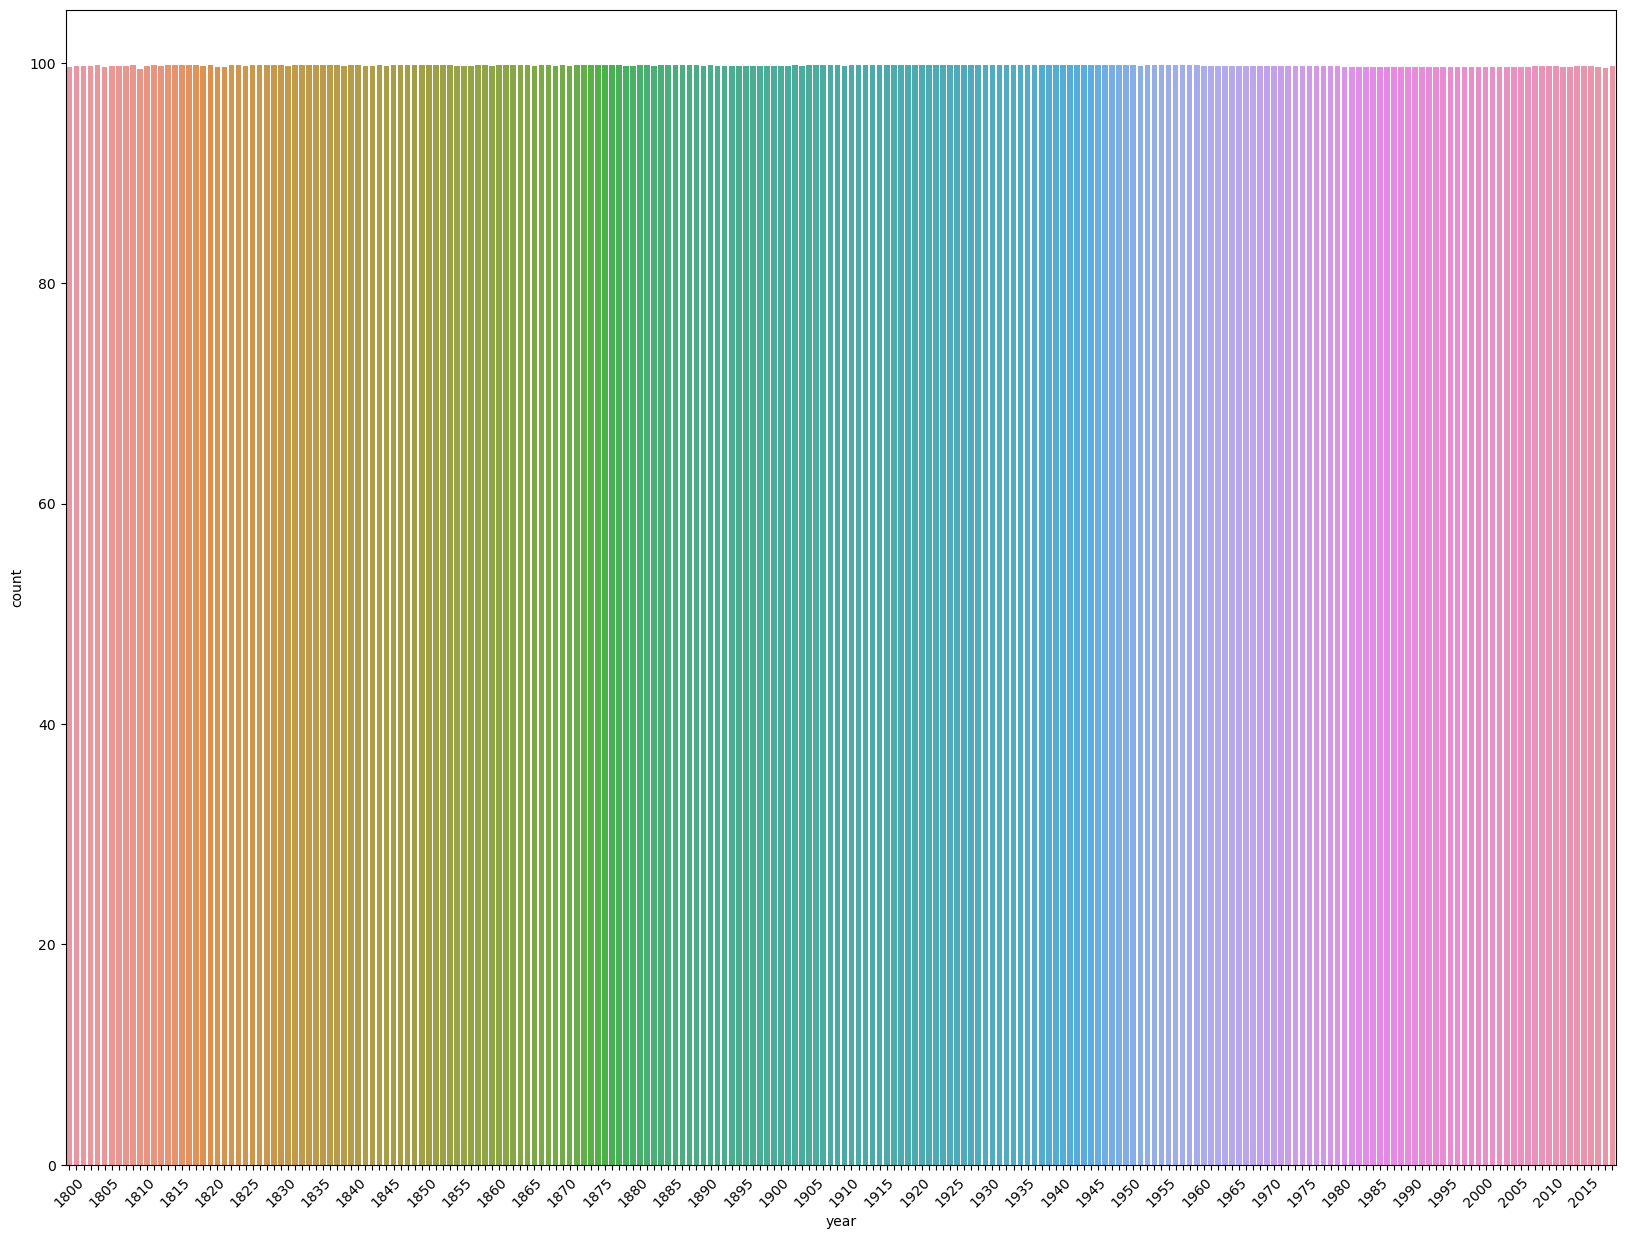

In [23]:
plt.figure(figsize = (20,15))
ax = sns.barplot(x=plot_df.index, y="count", data=plot_df)
_=ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
n = 5  # Keeps every 7th label
_=[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]

In [29]:
plot_df=context_df.loc[context_df.context.isin(to_save_context)]['year'].value_counts().to_frame()
plot_df=plot_df/context_df['year'].value_counts().to_frame()*100
plot_df.columns=['types_per']
plot_df

,types_per
1800,38.714575
1801,48.394878
1802,50.089910
1803,42.564694
1804,46.302988
...,...
2015,8.576881
2016,8.590774
2017,8.490077
2018,8.254555


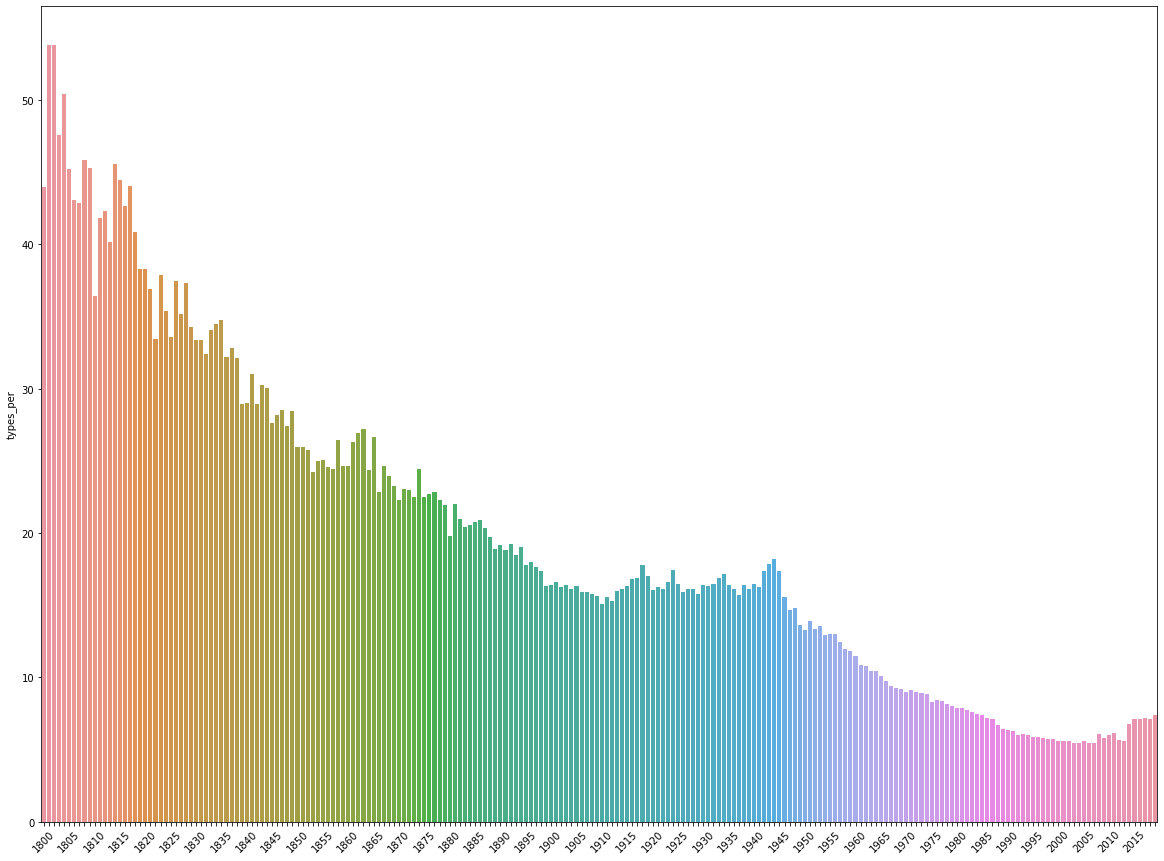

In [23]:
plt.figure(figsize = (20,15))
ax = sns.barplot(x=plot_df.index, y="types_per", data=plot_df)
_=ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
n = 5 
_=[lab.set_visible(False) for (i,lab) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]

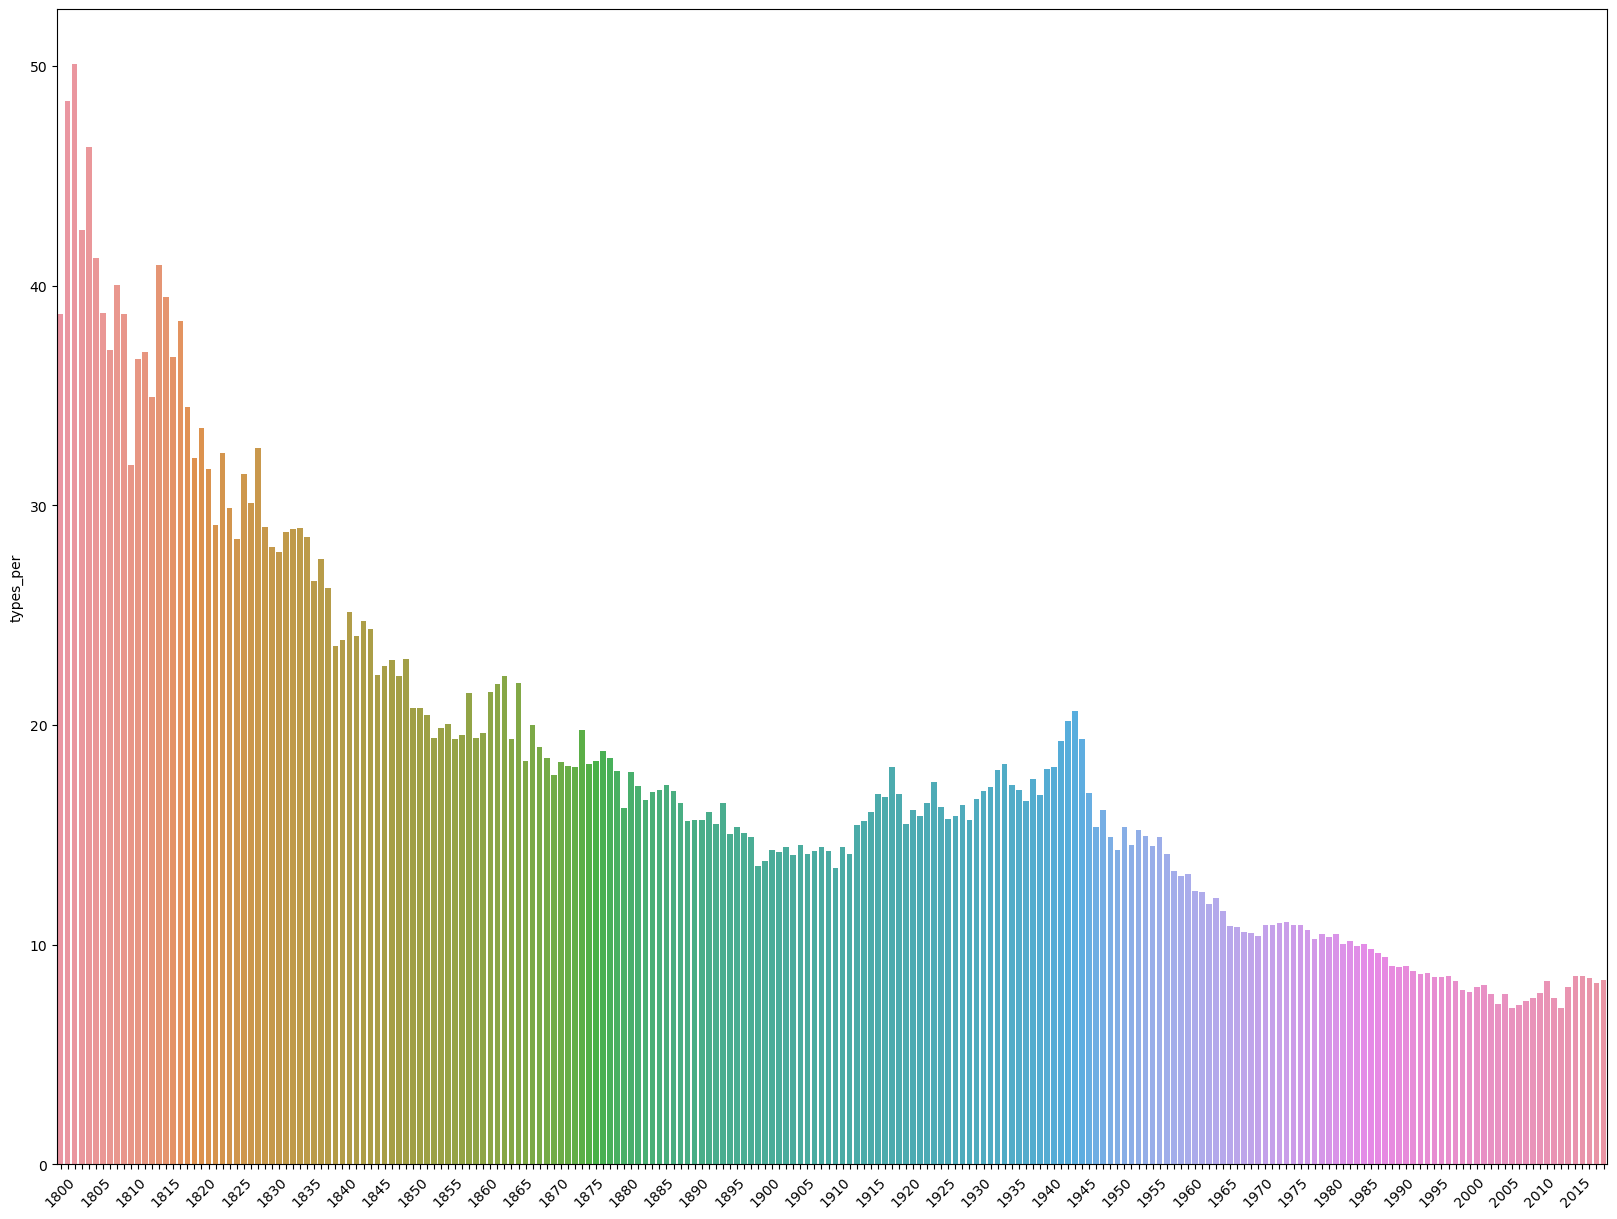

In [30]:
plt.figure(figsize = (20,15))
ax = sns.barplot(x=plot_df.index, y="types_per", data=plot_df)
_=ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
n = 5 
_=[lab.set_visible(False) for (i,lab) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]

In [31]:
context_df.loc[context_df.context.isin(to_save_context)]['year'].value_counts().to_frame()

,year
2008,64335
2006,64333
2009,64333
2003,64332
1994,64331
...,...
1814,50390
1805,50274
1801,50155
1802,49583


In [32]:
def topk_decade(df,k=10_000):
    
    df=df.groupby(['context'])['count'].sum().to_frame().reset_index()
    return df.sort_values(by='count',ascending=False).head(k)['context'].to_list()

In [35]:
topk_lists=context_df.groupby(['decade']).apply(topk_decade)
topk_lists=list((set(itertools.chain.from_iterable(topk_lists))))
len(topk_lists)

16248

In [37]:
with open('../datasets/contexts/contexts_top50k_new.pkl', 'wb') as f:
    pkl.dump(to_save_context, f)

In [38]:
len(to_save_context)

64360